In [111]:
# foldername = "Data/BGE/selected_10_feeders/Feeder_7130/"
# feedername = "7130"

# foldername = "Data/BGE/selected_10_feeders/Feeder_7361/"
# feedername = "7361"

# foldername = "Data/BGE/selected_10_feeders/Feeder_7366/"
# feedername = "7366"

# foldername = "Data/BGE/selected_10_feeders/Feeder_7425/"
# feedername = "7425"

# foldername = "Data/BGE/selected_10_feeders/Feeder_7616/"
# feedername = "7616"

# foldername = "Data/BGE/selected_10_feeders/Feeder_7651/"
# feedername = "7651"

# foldername = "Data/BGE/selected_10_feeders/Feeder_7731/"
# feedername = "7731"

# foldername = "Data/BGE/selected_10_feeders/Feeder_7779/"
# feedername = "7779"

# foldername = "Data/BGE/selected_10_feeders/Feeder_7873/"
# feedername = "7873"


# foldername = "Data/PHI_0217/Feeder_00496-twining_city/"
# feedername = "Feeder_00496-twining_city"

# foldername = "Data/PHI_0217/Feeder_14187-livingston/"
# feedername = "Feeder_14187-livingston"

# foldername = "Data/PHI_0217/Feeder_14711-14711/"
# feedername = "Feeder_14187-livingston"

# foldername = "Data/PHI_0217/Feeder_14748-sligo/"
# feedername = "Feeder_14748-sligo"

# foldername = "Data/PHI_0217/Feeder_14859-rockville/"
# feedername = "Feeder_14859-rockville"

# foldername = "Data/PHI_0217/Feeder_14884-middlebrook/"
# feedername = "Feeder_14884-middlebrook"

# foldername = "Data/PHI_0217/Feeder_14941-parklawn_drive/"
# feedername = "Feeder_14941-parklawn_drive"

# foldername = "Data/PHI_0217/Feeder_15144-bethesda/"
# feedername = "Feeder_15144-bethesda"

# foldername = "Data/PHI_0217/Feeder_15701-15701/"
# feedername = "Feeder_15701-15701"

foldername = "Data/PHI_0217/Feeder_15708-15708/"
feedername = "Feeder_15708-15708"

# PHI CRS
EPSG = '4438'

# BGE CRS
#EPSG = '2804'

with open(foldername + 'Lines.dss') as f:
    lines = f.readlines()

with open(foldername + 'Loads.dss') as f:
    loads = f.readlines()

with open(foldername + 'Transformers.dss') as f:
    trafo = f.readlines()

with open(foldername+'Capacitors.dss') as f:
    caps = f.readlines()

with open(foldername + 'Buscoords.dss') as f:
    buscoord = f.readlines()
    

# Line buses
line_se = []
line_re = []

for i in range(0, len(lines), 2):
    stri = lines[i]

    if stri[4:8] == 'Line':
        idx1 = stri.index('bus1')  # index of bus 1
        idx2 = stri.index('bus2')  # index of bus 2
        idx3 = stri.index('switch')  # index of switch
        bus1_name = stri[idx1 + 5:idx2 - 1]
        bus2_name = stri[idx2 + 5:idx3 - 1]
        line_se.append(bus1_name)
        line_re.append(bus2_name)
        
        
        
# Tranformer buses
trafo_se = []
trafo_re = []

for i in range(0, len(trafo), 2):
    if trafo[i][0:25] == 'New Transformer.trans_Reg': #Regulator branches
        stri = trafo[i]
        idx1 = stri.index('buses') #index of bus 1
        idx2 = stri.index('(', idx1+1) #index of bus 2
        idx3 = stri.index(',', idx2+1) #index of winding
        idx4 = stri.index(')', idx3+1)  # index of winding
        bus1_name = stri[idx2+1:idx3-2]
        bus2_name = stri[idx3+1:idx4-2]
        trafo_se.append(bus1_name)
        trafo_se.append(bus2_name)
        
    else: 
        stri = trafo[i]
        idx1 = stri.index('bus') #index of bus 1
        idx2 = stri.index('bus', idx1+1) #index of bus 2
        idx3 = stri.index('wdg=2') #index of winding
        idx4 = stri.index('XHL')  # index of winding
        bus1_name = stri[idx1+4:idx3-1]
        bus2_name = stri[idx2+4:idx4-1]
        trafo_se.append(bus1_name)
        trafo_se.append(bus2_name)
    
    

    # Load buses
load_bus_list = []
for i in range(0, len(loads), 2):
    stri = loads[i]
    idx1 = stri.index('bus1')  # index of bus 1
    idx2 = stri.index(' ', idx1+1)
    load_bus = stri[idx1 + 5:idx2 - 2]
    load_bus_list.append(load_bus)
    

    # Cap buses
cap_bus_list = []
for i in range(0, len(caps), 2):
    stri = caps[i]
    idx1 = stri.index('Bus1')  # index of bus 1
    idx2 = stri.index('phases')
    cap_bus = stri[idx1 + 5:idx2 - 1]
    cap_bus_list.append(cap_bus)
    
    

bus_list = line_se + line_re + trafo_se + trafo_re + load_bus_list + cap_bus_list

# Bus coordinates
bus_coord_list = []
for i in range(0, len(buscoord), 1):
    stri = buscoord[i]
    idx1 = stri.index(' ')  # index of bus 1
    bus_coord = stri[0:idx1]
    bus_coord_list.append(bus_coord)

In [112]:
# Eliminating phasing (.1.2.3) from bus list to make it comparable to bus coordinates files
new_bus_list = []

for s in bus_list:
    length = len(s)

    if s[length - 12:] == '.1.2.3.1.2.3':
        n = length - 1
        replacement = ''
        res_str = s[0:n - 11] + replacement
        new_bus_list.append(res_str)

    elif s[length - 12:] == '.1.2.3.3.1.2':
        n = length - 1
        replacement = ''
        res_str = s[0:n - 11] + replacement
        new_bus_list.append(res_str)

    elif s[length - 12:] == '.1.2.3.2.1.3':
        n = length - 1
        replacement = ''
        res_str = s[0:n - 11] + replacement
        new_bus_list.append(res_str)

    elif s[length - 12:] == '.3.1.2.1.2.3':
        n = length - 1
        replacement = ''
        res_str = s[0:n - 11] + replacement
        new_bus_list.append(res_str)

    elif s[length - 12:] == '.2.1.3.1.2.3':
        n = length - 1
        replacement = ''
        res_str = s[0:n - 11] + replacement
        new_bus_list.append(res_str)

    elif s[length - 6:] == '.1.2.3':
        n = length - 1
        replacement = ''
        res_str = s[0:n - 5] + replacement
        new_bus_list.append(res_str)

    elif s[length - 6:] == '.1.3.2':
        n = length - 1
        replacement = ''
        res_str = s[0:n - 5] + replacement
        new_bus_list.append(res_str)

    elif s[length - 6:] == '.3.2.1':
        n = length - 1
        replacement = ''
        res_str = s[0:n - 5] + replacement
        new_bus_list.append(res_str)

    elif s[length - 6:] == '.3.1.2':
        n = length - 1
        replacement = ''
        res_str = s[0:n - 5] + replacement
        new_bus_list.append(res_str)


    elif s[length - 6:] == '.2.3.1':
        n = length - 1
        replacement = ''
        res_str = s[0:n - 5] + replacement
        new_bus_list.append(res_str)

    elif s[length - 6:] == '.2.1.3':
        n = length - 1
        replacement = ''
        res_str = s[0:n - 5] + replacement
        new_bus_list.append(res_str)

    elif s[length - 4:] == '.1.1':
        n = length - 1
        replacement = ''
        res_str = s[0:n - 3] + replacement
        new_bus_list.append(res_str)

    elif s[length - 4:] == '.1.3':
        n = length - 1
        replacement = ''
        res_str = s[0:n - 3] + replacement
        new_bus_list.append(res_str)

    elif s[length - 4:] == '.1.2':
        n = length - 1
        replacement = ''
        res_str = s[0:n - 3] + replacement
        new_bus_list.append(res_str)

    elif s[length - 4:] == '.2.1':
        n = length - 1
        replacement = ''
        res_str = s[0:n - 3] + replacement
        new_bus_list.append(res_str)

    elif s[length - 4:] == '.2.2':
        n = length - 1
        replacement = ''
        res_str = s[0:n - 3] + replacement
        new_bus_list.append(res_str)

    elif s[length - 4:] == '.2.3':
        n = length - 1
        replacement = ''
        res_str = s[0:n - 3] + replacement
        new_bus_list.append(res_str)

    elif s[length - 4:] == '.3.1':
        n = length - 1
        replacement = ''
        res_str = s[0:n - 3] + replacement
        new_bus_list.append(res_str)

    elif s[length - 4:] == '.3.2':
        n = length - 1
        replacement = ''
        res_str = s[0:n - 3] + replacement
        new_bus_list.append(res_str)

    elif s[length - 4:] == '.3.3':
        n = length - 1
        replacement = ''
        res_str = s[0:n - 3] + replacement
        new_bus_list.append(res_str)

    elif s[length - 2:] == '.1':
        n = length - 1
        replacement = ''
        res_str = s[0:n - 1] + replacement
        new_bus_list.append(res_str)

    elif s[length - 2:] == '.2':
        n = length - 1
        replacement = ''
        res_str = s[0:n - 1] + replacement
        new_bus_list.append(res_str)

    elif s[length - 2:] == '.3':
        n = length - 1
        replacement = ''
        res_str = s[0:n - 1] + replacement
        new_bus_list.append(res_str)

    else:
        new_bus_list.append(s)

# # First convert buscoords list to uppercase
upper_bus_coords = []
for s in bus_coord_list:
    caps = s.upper()
    # print(f'upper case is written as {caps}')
    upper_bus_coords.append(caps)

# convert bus list to uppercase
upper_bus_list = []
for s in new_bus_list:
    caps = s.upper()
    # print(f'upper case is written as {caps}')
    upper_bus_list.append(caps)

real_bus_set = set(upper_bus_list)  # unique bus list in uppercase
real_bus_list = list(real_bus_set)


# Checking which buses do not have coordinates
res = [x for x in real_bus_list + upper_bus_coords if x not in upper_bus_coords]

# Checking redundant buses which have buscoords
redundant = [x for x in real_bus_list + upper_bus_coords if x not in real_bus_list]


In [113]:
import pyproj

real_bus_coords = []
for r in range(0, len(real_bus_list)):
    if real_bus_list[r] in upper_bus_coords:
        temp = upper_bus_coords.index(real_bus_list[r])
        real_bus_coords.append(buscoord[temp])
        
        
        
bus_list = []
x_list = []
y_list = []
lat_list = []
lon_list = []
buscoord_lon_lat = []
for i in range(0, len(real_bus_coords), 1):
    stri = real_bus_coords[i]
    idx1 = stri.index(' ')
    idx2 = stri.index(' ', idx1 + 1)
    x_temp = float(stri[idx1+1:idx2])
    y_temp = float(stri[idx2 + 1:len(stri)-1])
    x_list.append(x_temp)
    y_list.append(y_temp)
    # BGE Maryland
    #transformer = pyproj.Transformer.from_crs("epsg:2804", "epsg:4326", always_xy=True)
    # PHI Maryland
    #transformer = pyproj.Transformer.from_crs("epsg:3748", "epsg:4326", always_xy=True)
    transformer = pyproj.Transformer.from_crs("epsg:"+EPSG, "epsg:4326", always_xy=True)


    # https://www.spatialreference.org/ref/?search=2804&srtext=Search
    # I used this to look up the projection with reference to Maryland coordinate system
    x2, y2 = transformer.transform(x_temp, y_temp)
    bus_list.append(stri[0:idx1])
    lon_list.append(x2)
    lat_list.append(y2)
    buscoord_lon_lat.append([stri[0:idx1], x2, y2]) 
    
    
## Writing to an CSV file using Python
import csv

with open(foldername +'Bus_coordinates.csv', mode='w', newline= '') as file:
    writer = csv.writer(file)
    writer.writerow(['Bus_ID', 'Longitude', 'Latitude'])
    for i in range(0, len(bus_list)):
        writer.writerow([bus_list[i], lon_list[i], lat_list[i]])

In [114]:
# This constructs a graph to show the connection of the feeder
# The main files used are the series elements consisting of the lines and transformers


with open(foldername +'Lines.dss') as f:
    lines = f.readlines()

with open(foldername +'Transformers.dss') as f:
    trafo = f.readlines()
    
se = []
re = []

for i in range(0, len(lines), 2):
    stri = lines[i]

    if stri[4:8] == 'Line':
        idx0 = stri.index('enabled=')
        if stri[idx0:idx0+9] == 'enabled=y':
            idx1 = stri.index('bus1') #index of bus 1
            idx2 = stri.index('bus2') #index of bus 2
            idx3 = stri.index('switch') #index of switch
            bus1_name = stri[idx1+5:idx2-1]
            bus2_name = stri[idx2+5:idx3-1]
            se.append(bus1_name)
            re.append(bus2_name)    
            
            
# Extracting the transformers' primary and secondary buses
for i in range(0, len(trafo), 2):
    if trafo[i][0:25] == 'New Transformer.trans_Reg': #Regulator branches
        stri = trafo[i]
        idx1 = stri.index('buses') #index of bus 1
        idx2 = stri.index('(', idx1+1) #index of bus 2
        idx3 = stri.index(',', idx2+1) #index of winding
        idx4 = stri.index(')', idx3+1)  # index of winding
        bus1_name = stri[idx2+1:idx3-2]
        bus2_name = stri[idx3+1:idx4-2]
        se.append(bus1_name)
        re.append(bus2_name)
        
    else: 
        stri = trafo[i]
        idx1 = stri.index('bus') #index of bus 1
        idx2 = stri.index('bus', idx1+1) #index of bus 2
        idx3 = stri.index('wdg=2') #index of winding
        idx4 = stri.index('XHL')  # index of winding
        bus1_name = stri[idx1+4:idx3-1]
        bus2_name = stri[idx2+4:idx4-1]
        se.append(bus1_name)
        re.append(bus2_name)

In [115]:
# Checking for duplicate series elements (in lines and trafo)
news = []
for i in range(len(se)):
    print(se[i], re[i])
    temp = [se[i], re[i]]
    news.append(temp)

unique_elements = [] # empty list to hold unique elements from the list
dup_elements = [] # empty list to hold the duplicate elements from the list
for i in news:
    if i not in unique_elements:
        unique_elements.append(i)
    else:
        dup_elements.append(i) # this method catches the first duplicate entries, and appends them to the list
# The next step is to print the duplicate entries, and the unique entries
print("List of duplicates", dup_elements)
print("Unique Item List", unique_elements) # prints the final list of unique items


804388-703778-63719.1.2.3 1076219_696_14132691_038.1.2.3
1074625_342_14128521_291.1.2.3 803384-215566-1-495200.1.2.3
1074761_276_14132810_86.1.2.3 803388-265842-2-60033.1.2.3
1072473_003_14130485_656.1.2.3 801386-020462-4-481835.1.2.3
1074761_276_14132810_86.1.2.3 803388-265842-1-58934.1.2.3
1072447_261_14129387_607.1.2.3 801385-019376-3-487850.1.2.3
1075195_142_14128695_584.1.2.3 1075232_052_14128718_461.1.2.3
801386-366019-4-486484.2 1072796_948_14129990_835.2
800386-937745-4-63097.1.2.3 1072405_265_14130771_481.1.2.3
1073797_811_14130041_223.1.2.3 802386-354059-3-483153.1.2.3
1073456_031_14130033_003.1.2.3 1073456_094_14130035_503.1.2.3
1072729_424_14130691_5.1.2.3 801386-272672-3-484924.1.2.3
799385-665914-3-510572.1.2.3 800385-374468-3-481903.1.2.3
1074627_896_14129622_058.1.2.3 803385-206657-3-497725.1.2.3
1073797_811_14130041_223.1.2.3 802386-354059-4-482343.1.2.3
799386-360049-2-497890.1.2.3 1070800_609_14130100_311.1.2.3
800385-621491-3-481834.1.2.3 1072042_404_14129514_53.1.2

In [116]:

# The goal is to plot the graph of all the buses
# Hence it is necessary to remove the phasing information i.e. '.1.2.3'
se_wo_phs = []
for s in se:
    length = len(s)

    if s[length - 12:] == '.1.2.3.1.2.3':
        n = length - 1
        replacement = ''
        res_str = s[0:n - 11] + replacement
        se_wo_phs.append(res_str)

    elif s[length - 12:] == '.1.2.3.3.1.2':
        n = length - 1
        replacement = ''
        res_str = s[0:n - 11] + replacement
        se_wo_phs.append(res_str)

    elif s[length - 12:] == '.1.2.3.2.1.3':
        n = length - 1
        replacement = ''
        res_str = s[0:n - 11] + replacement
        se_wo_phs.append(res_str)

    elif s[length - 12:] == '.3.1.2.1.2.3':
        n = length - 1
        replacement = ''
        res_str = s[0:n - 11] + replacement
        se_wo_phs.append(res_str)

    elif s[length - 12:] == '.2.1.3.1.2.3':
        n = length - 1
        replacement = ''
        res_str = s[0:n - 11] + replacement
        se_wo_phs.append(res_str)

    elif s[length - 6:] == '.1.2.3':
        n = length - 1
        replacement = ''
        res_str = s[0:n - 5] + replacement
        se_wo_phs.append(res_str)

    elif s[length - 6:] == '.1.3.2':
        n = length - 1
        replacement = ''
        res_str = s[0:n - 5] + replacement
        se_wo_phs.append(res_str)

    elif s[length - 6:] == '.3.2.1':
        n = length - 1
        replacement = ''
        res_str = s[0:n - 5] + replacement
        se_wo_phs.append(res_str)

    elif s[length - 6:] == '.3.1.2':
        n = length - 1
        replacement = ''
        res_str = s[0:n - 5] + replacement
        se_wo_phs.append(res_str)

    elif s[length - 6:] == '.2.3.1':
        n = length - 1
        replacement = ''
        res_str = s[0:n - 5] + replacement
        se_wo_phs.append(res_str)

    elif s[length - 6:] == '.2.1.3':
        n = length - 1
        replacement = ''
        res_str = s[0:n - 5] + replacement
        se_wo_phs.append(res_str)

    elif s[length - 4:] == '.1.1':
        n = length - 1
        replacement = ''
        res_str = s[0:n - 3] + replacement
        se_wo_phs.append(res_str)

    elif s[length - 4:] == '.1.3':
        n = length - 1
        replacement = ''
        res_str = s[0:n - 3] + replacement
        se_wo_phs.append(res_str)

    elif s[length - 4:] == '.1.2':
        n = length - 1
        replacement = ''
        res_str = s[0:n - 3] + replacement
        se_wo_phs.append(res_str)

    elif s[length - 4:] == '.2.1':
        n = length - 1
        replacement = ''
        res_str = s[0:n - 3] + replacement
        se_wo_phs.append(res_str)

    elif s[length - 4:] == '.2.2':
        n = length - 1
        replacement = ''
        res_str = s[0:n - 3] + replacement
        se_wo_phs.append(res_str)

    elif s[length - 4:] == '.2.3':
        n = length - 1
        replacement = ''
        res_str = s[0:n - 3] + replacement
        se_wo_phs.append(res_str)

    elif s[length - 4:] == '.3.1':
        n = length - 1
        replacement = ''
        res_str = s[0:n - 3] + replacement
        se_wo_phs.append(res_str)

    elif s[length - 4:] == '.3.2':
        n = length - 1
        replacement = ''
        res_str = s[0:n - 3] + replacement
        se_wo_phs.append(res_str)

    elif s[length - 4:] == '.3.3':
        n = length - 1
        replacement = ''
        res_str = s[0:n - 3] + replacement
        se_wo_phs.append(res_str)

    elif s[length - 2:] == '.1':
        n = length - 1
        replacement = ''
        res_str = s[0:n - 1] + replacement
        se_wo_phs.append(res_str)

    elif s[length - 2:] == '.2':
        n = length - 1
        replacement = ''
        res_str = s[0:n - 1] + replacement
        se_wo_phs.append(res_str)

    elif s[length - 2:] == '.3':
        n = length - 1
        replacement = ''
        res_str = s[0:n - 1] + replacement
        se_wo_phs.append(res_str)

    else:
        se_wo_phs.append(s)



re_wo_phs = []
for r in re:
    length = len(r)

    if r[length - 12:] == '.1.2.3.1.2.3':
        n = length - 1
        replacement = ''
        res_str = r[0:n - 11] + replacement
        re_wo_phs.append(res_str)

    elif r[length - 12:] == '.1.2.3.3.1.2':
        n = length - 1
        replacement = ''
        res_str = r[0:n - 11] + replacement
        re_wo_phs.append(res_str)

    elif r[length - 12:] == '.1.2.3.2.1.3':
        n = length - 1
        replacement = ''
        res_str = r[0:n - 11] + replacement
        re_wo_phs.append(res_str)

    elif r[length - 12:] == '.3.1.2.1.2.3':
        n = length - 1
        replacement = ''
        res_str = r[0:n - 11] + replacement
        re_wo_phs.append(res_str)

    elif r[length - 12:] == '.2.1.3.1.2.3':
        n = length - 1
        replacement = ''
        res_str = r[0:n - 11] + replacement
        re_wo_phs.append(res_str)

    elif r[length - 6:] == '.1.2.3':
        n = length - 1
        replacement = ''
        res_str = r[0:n - 5] + replacement
        re_wo_phs.append(res_str)

    elif r[length - 6:] == '.1.3.2':
        n = length - 1
        replacement = ''
        res_str = r[0:n - 5] + replacement
        re_wo_phs.append(res_str)

    elif r[length - 6:] == '.3.2.1':
        n = length - 1
        replacement = ''
        res_str = r[0:n - 5] + replacement
        re_wo_phs.append(res_str)

    elif r[length - 6:] == '.3.1.2':
        n = length - 1
        replacement = ''
        res_str = r[0:n - 5] + replacement
        re_wo_phs.append(res_str)


    elif r[length - 6:] == '.2.3.1':
        n = length - 1
        replacement = ''
        res_str = r[0:n - 5] + replacement
        re_wo_phs.append(res_str)

    elif r[length - 6:] == '.2.1.3':
        n = length - 1
        replacement = ''
        res_str = r[0:n - 5] + replacement
        re_wo_phs.append(res_str)

    elif r[length - 4:] == '.1.1':
        n = length - 1
        replacement = ''
        res_str = r[0:n - 3] + replacement
        re_wo_phs.append(res_str)

    elif r[length - 4:] == '.1.3':
        n = length - 1
        replacement = ''
        res_str = r[0:n - 3] + replacement
        re_wo_phs.append(res_str)

    elif r[length - 4:] == '.1.2':
        n = length - 1
        replacement = ''
        res_str = r[0:n - 3] + replacement
        re_wo_phs.append(res_str)

    elif r[length - 4:] == '.2.1':
        n = length - 1
        replacement = ''
        res_str = r[0:n - 3] + replacement
        re_wo_phs.append(res_str)

    elif r[length - 4:] == '.2.2':
        n = length - 1
        replacement = ''
        res_str = r[0:n - 3] + replacement
        re_wo_phs.append(res_str)

    elif r[length - 4:] == '.2.3':
        n = length - 1
        replacement = ''
        res_str = r[0:n - 3] + replacement
        re_wo_phs.append(res_str)

    elif r[length - 4:] == '.3.1':
        n = length - 1
        replacement = ''
        res_str = r[0:n - 3] + replacement
        re_wo_phs.append(res_str)

    elif r[length - 4:] == '.3.2':
        n = length - 1
        replacement = ''
        res_str = r[0:n - 3] + replacement
        re_wo_phs.append(res_str)

    elif r[length - 4:] == '.3.3':
        n = length - 1
        replacement = ''
        res_str = r[0:n - 3] + replacement
        re_wo_phs.append(res_str)

    elif r[length - 2:] == '.1':
        n = length - 1
        replacement = ''
        res_str = r[0:n - 1] + replacement
        re_wo_phs.append(res_str)

    elif r[length - 2:] == '.2':
        n = length - 1
        replacement = ''
        res_str = r[0:n - 1] + replacement
        re_wo_phs.append(res_str)

    elif r[length - 2:] == '.3':
        n = length - 1
        replacement = ''
        res_str = r[0:n - 1] + replacement
        re_wo_phs.append(res_str)

    else:
        re_wo_phs.append(r)

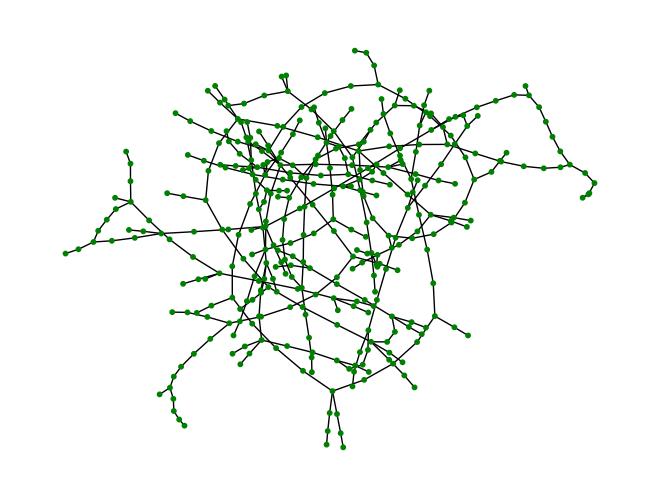

True

In [117]:
# Plotting thee graph
import networkx as nx
import matplotlib.pyplot as plt

g = nx.Graph()

new = []
for i in range(len(re_wo_phs)):
    g.add_edge(se_wo_phs[i], re_wo_phs[i])
#     print(se_wo_phs[i], re_wo_phs[i])
    temp = [se_wo_phs[i], re_wo_phs[i]]
    new.append(temp)
    
    
color_map = ['red' if node == '20101100104-XFO' else 'green' for node in g]
size_map = [50 if node == '20101100104-XFO' else 10 for node in g]
# nx.draw(g, with_labels = True)
nx.draw(g, node_size=size_map, node_color=color_map)
plt.show()

nx.is_connected(g)

In [118]:
## Writing to an CSV file using Python
import csv

with open(foldername +'Feeder_' + feedername+'_Node_connections_wo_norm_open_sw.csv', mode='w', newline= '') as file:
    writer = csv.writer(file)
    writer.writerow(['From_node', 'To_node'])
    for i in range(0, len(re_wo_phs)):
        writer.writerow([se_wo_phs[i], re_wo_phs[i]])

In [119]:
import pandas as pd

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

feeder = pd.read_csv(foldername+ "Bus_coordinates.csv")
#se_re = pd.read_csv("./Feeder_7130_Node_connections_wo_norm_open_sw.csv")
se_re = pd.read_csv( foldername + 'Feeder_' + feedername +'_Node_connections_wo_norm_open_sw.csv')



temp = list(feeder["Bus_ID"])
bus_ID_cap = []
for s in temp:
    caps = s.upper()
    bus_ID_cap.append(caps)

temp = list(se_re["From_node"])
se_cap = []
for s in temp:
    caps = s.upper()
    se_cap.append(caps)


temp = list(se_re["To_node"])
re_cap = []
for r in temp:
    caps = r.upper()
    re_cap.append(caps)

new_list=se_cap+re_cap

unique_elements = [] # empty list to hold unique elements from the list
dup_elements = [] # empty list to hold the duplicate elements from the list
for i in new_list:
    if i not in unique_elements:
        unique_elements.append(i)
    else:
        dup_elements.append(i)


busID_cap2 = []
bus_lon = []
bus_lat = []
for u in unique_elements:
    temp2 = bus_ID_cap.index(u)
    if temp2 >=0:
        lon = feeder["Longitude"][temp2]
        lat = feeder["Latitude"][temp2]
        busID_cap2.append(u)
        bus_lon.append(lon)
        bus_lat.append(lat)


## Writing to an CSV file using Python
import csv

with open(foldername+'Feeder_'+feedername+'_Bus_coordinates_no_sw.csv', mode='w', newline= '') as file:
    writer = csv.writer(file)
    writer.writerow(['Bus_ID', 'Longitude', 'Latitude'])
    for i in range(0, len(busID_cap2)):
        writer.writerow([busID_cap2[i], bus_lon[i], bus_lat[i]])







se_lon = []
se_lat = []
re_lon = []
re_lat = []
se_busID = []
re_busID = []


for s in se_cap:
    temp2 = busID_cap2.index(s)
    if temp2 >=0:
        lon = bus_lon[temp2]
        lat = bus_lat[temp2]
        se_busID.append(s)
        se_lon.append(lon)
        se_lat.append(lat)

for r in re_cap:
    temp2 = busID_cap2.index(r)
    if temp2 >=0:
        lon = bus_lon[temp2]
        lat = bus_lat[temp2]
        re_busID.append(r)
        re_lon.append(lon)
        re_lat.append(lat)


## Writing to an CSV file using Python
import csv

with open(foldername + 'se_re_lon_lat_nosw.csv', mode='w', newline= '') as file:
    writer = csv.writer(file)
    writer.writerow(['se_lon', 'se_lat', 're_lon', 're_lat', 'se_busID', 're_busID'])
    for i in range(0, len(se_lon)):
        writer.writerow([se_lon[i], se_lat[i], re_lon[i], re_lat[i], se_busID[i], re_busID[i]])


In [120]:
import pandas as pd
import numpy as np

feeder = pd.read_csv(foldername + "Feeder_"+feedername+"_Bus_coordinates_no_sw.csv")
se_re_lon_lat = pd.read_csv(foldername + "se_re_lon_lat_nosw.csv")


import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scattermapbox(lat=feeder["Latitude"], lon=feeder["Longitude"],
    mode = "markers", 
    marker = {'size': 10, 'color': "fuchsia",},
    hoverinfo = 'text',
    text = feeder["Bus_ID"],
                              ))

for i in range(len(se_re_lon_lat["se_lon"])):
    fig.add_trace(
        go.Scattermapbox(
            lon = [se_re_lon_lat["se_lon"][i], se_re_lon_lat["re_lon"][i]],
            lat = [se_re_lon_lat["se_lat"][i], se_re_lon_lat["re_lat"][i]],
            mode = 'lines',
            line = dict(width = 1, color = 'blue')
        ))
    

# getting center for plots:
lat_center = np.mean(feeder["Latitude"])
long_center = np.mean(feeder["Longitude"])

fig.update_layout(mapbox_style="open-street-map",
                  showlegend = False,
                  title_text = 'paths<br>Feeder on the map',)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.update_layout(mapbox = {'zoom': 10, 'center': {'lat': lat_center, 
                          'lon': long_center},}, height=700)

fig.show()